In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
wine=pd.read_csv("winequality.csv")
wine.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [4]:
wine.shape

(1599, 12)

In [5]:
wine.info()
wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0.5, 1.0, 'Correlation between the columns')

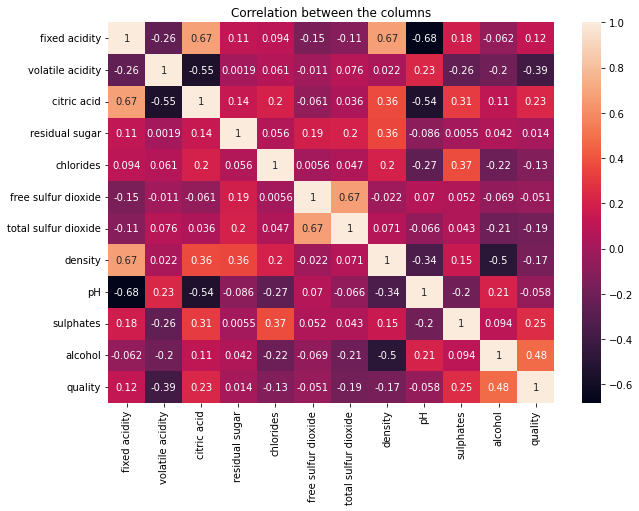

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(wine.corr(),annot=True)
plt.title("Correlation between the columns")

Heatmap shows that 'alcohol' has the highest correlation with the target variable 'quality', while columns 'volatile acidity' has the least.

c:\users\pratik\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

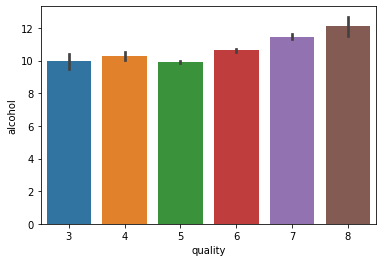

In [8]:
sns.barplot(wine['quality'],wine['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='Count'>

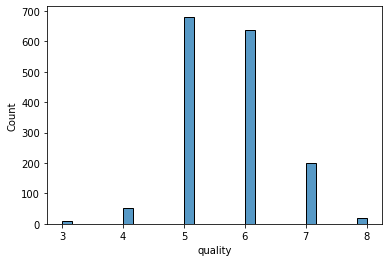

In [9]:
sns.histplot(data=wine,x="quality")

Only the wine of quality>6.5 are considered good wines

In [10]:
wine['quality']=wine.quality.apply(lambda x:1 if x>=6.5 else 0)

In [11]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

Splitting data

In [12]:
X=wine.drop('quality',axis=1)
y=wine['quality']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 75 to 1169
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         480 non-null    float64
 1   volatile acidity      480 non-null    float64
 2   citric acid           480 non-null    float64
 3   residual sugar        480 non-null    float64
 4   chlorides             480 non-null    float64
 5   free sulfur dioxide   480 non-null    float64
 6   total sulfur dioxide  480 non-null    float64
 7   density               480 non-null    float64
 8   pH                    480 non-null    float64
 9   sulphates             480 non-null    float64
 10  alcohol               480 non-null    float64
dtypes: float64(11)
memory usage: 45.0 KB


Training, first with Decision Tree

In [18]:
dectree=DecisionTreeClassifier()
dectree.fit(X_train,y_train)
pred_dc=dectree.predict(X_test)
accuracy_dc=accuracy_score(pred_dc,y_test)*100
print("Accuracy Percentage for Decision Tree=",accuracy_dc,"%")

Accuracy Percentage for Decision Tree= 88.33333333333333 %


In [19]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pred_dc),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,396,29
Actual Yes,27,28


Now, with Random Forest

In [21]:
randfor=RandomForestClassifier()
randfor.fit(X_train,y_train)
pred_rf=randfor.predict(X_test)
accuracy_rf= accuracy_score(pred_rf,y_test)*100
print("Accuracy Percentage for Random Forest=",accuracy_rf,"%")

Accuracy Percentage for Random Forest= 91.45833333333333 %


In [22]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pred_rf),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,411,14
Actual Yes,27,28
